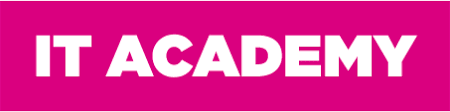

<div class="alert alert-block alert-info">\begin{align*}Alex\:Kumenius - Business\hspace{2mm}Intelligence\hspace{2mm}Data\hspace{2mm}Scientist\end{align*}

\begin{align*}Date : Abril\hspace{2mm}21^{th}\hspace{2mm}2021\end{align*}</div>

# <span style=color:darkblue>Multiple regression</span>

The principles of <span style=color:blue>simple linear regression</span> lay the foundation for more sophisticated <span style=color:blue>regression methods</span> used in a wide range of challenging settings. We explore <span style=color:blue>multiple regression</span>, which introduces the <b>possibility of more than <u>one predictor</u></b>, and <span style=color:blue>logistic regression</span>, a technique for <b>predicting</b> <span style=color:blue>categorical outcomes</span> with <b>two possible</b> <span style=color:blue><b>categories</b></span>.

## <span style=color:darkgreen>Introduction to multiple regression</span>

<span style=color:blue>Multiple or multivariate linear regression</span> is a case of <span style=color:blue>linear regression</span> with <b>two or more <u>independent</u></b> variables.

- If there are just <b><u>two independent variables</u></b>, the estimated <span style=color:blue>regression function is : $\:f(x_1,\:x_2)\:=\:b_{0}\:+\:b_1x_1\:+\:b_2x_2$ </span>.   

    It represents a regression plane in a three-dimensional space. The goal of regression is to determine the values of the weights <span style=color:blue>$\:b_0,\:b_1\:$</span>, and <span style=color:blue>$\:b_2\:$</span> such that this plane is as close as possible to the <b>actual <u>responses</u></b> and <span style=color:blue><b>yield the minimal SSR</b></span>.   
$%$   
- The case of <b><u>more than two independent variables</u></b> is similar, but more general. The estimated regression function is <span style=color:blue>$\:f(x_1,\:...,x_k)\:=\:b_{0}\:+\:b_1x_1\:+\:...\:+\:b_rx_k,\:$</span> and there are <span style=color:blue>$\:k\:$ + 1</span> weights to be determined when the number of inputs is <span style=color:blue>$\:k\:$</span>.

<span style=color:blue><b>Multiple regression</b></span> extends <span style=color:blue>simple two-variable regression</span> to the case that still has <b>one response</b> but <b>many predictors (denoted <span style=color:blue>$\:x_1\:$, $\:x_2\:$, $\:x_3\:$, ...</span>)</b>.   

The method is used in scenarios where many variables may be simultaneously connected to an output.

In [1]:
# import libraries needed
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import researchpy as rp
import statsmodels.api as sm
import seaborn as sns

from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

In [2]:
# Open the choosen file
marioKart = pd.read_csv('D:\\Documents\\00 BIDDLS\\01 BIDDLS Project PORTFOLIO\\01 BIDDLS_Projects DONE\\01 Formacion Eurecat\\BIDDLS Eurecat 2019\\BTS\\Datasets\\marioKart.txt', sep='\t', 
                        encoding='utf-8', usecols=[6,3,9,1,10])

#marioKart = pd.read_csv('D:\\Documents\\EureCat\\Eurecat 2019\\BTS\\Datasets\\marioKart.txt', sep='\t', encoding='utf-8')

marioKart.head()

,duration,cond,totalPr,stockPhoto,wheels
0,3,new,51.55,yes,1
1,7,used,37.04,yes,1
2,3,new,45.50,no,1
3,3,new,44.00,yes,1
4,1,new,71.00,yes,2


In [3]:
marioKart.shape

(143, 5)

In [4]:
marioKart.describe()

,duration,totalPr,wheels
count,143.000000,143.00000,143.000000
mean,3.769231,49.88049,1.146853
std,2.585693,25.68856,0.847183
min,1.000000,28.98000,0.000000
25%,1.000000,41.17500,0.000000
50%,3.000000,46.50000,1.000000
75%,7.000000,53.99000,2.000000
max,10.000000,326.51000,4.000000


In [5]:
marioKart.corr()

,duration,totalPr,wheels
duration,1.000000,-0.041235,-0.299473
totalPr,-0.041235,1.000000,0.329984
wheels,-0.299473,0.329984,1.000000


In [6]:
marioKart.stockPhoto.unique()

array(['yes', 'no'], dtype=object)

In [7]:
marioKart.cond.unique()

array(['new', 'used'], dtype=object)

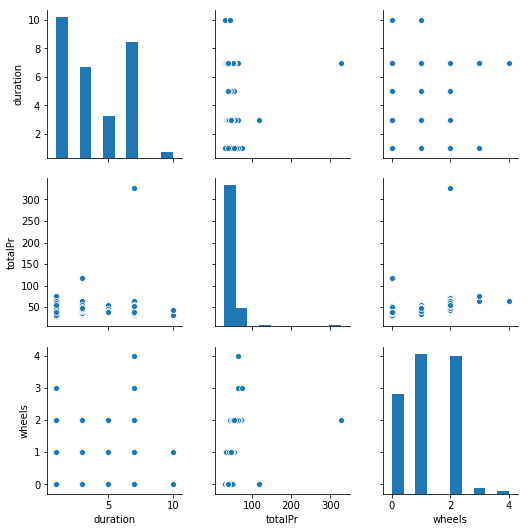

In [8]:
sns.pairplot(marioKart)

In [9]:
# convert categorical variable into binary values

marioKart.cond.replace(['new', 'used'], [1, 0], inplace=True)
marioKart.head()

,duration,cond,totalPr,stockPhoto,wheels
0,3,1,51.55,yes,1
1,7,0,37.04,yes,1
2,3,1,45.50,no,1
3,3,1,44.00,yes,1
4,1,1,71.00,yes,2


In [10]:
# convert categorical variable into binary values

marioKart.stockPhoto.replace(['yes', 'no'], [1, 0], inplace=True)
marioKart.head()

,duration,cond,totalPr,stockPhoto,wheels
0,3,1,51.55,1,1
1,7,0,37.04,1,1
2,3,1,45.50,0,1
3,3,1,44.00,1,1
4,1,1,71.00,1,2


In [14]:
marioKart.describe().round(3)

,duration,cond,totalPr,stockPhoto,wheels
count,143.000,143.000,143.000,143.000,143.000
mean,3.769,0.413,49.880,0.734,1.147
std,2.586,0.494,25.689,0.443,0.847
min,1.000,0.000,28.980,0.000,0.000
25%,1.000,0.000,41.175,0.000,0.000
50%,3.000,0.000,46.500,1.000,1.000
75%,7.000,1.000,53.990,1.000,2.000
max,10.000,1.000,326.510,1.000,4.000


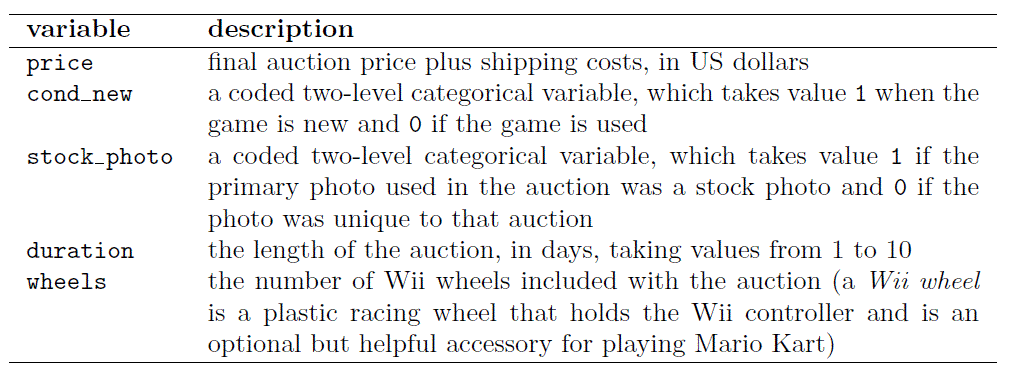

### <span style=color:darkred>A single-variable model</span>

In [11]:
marioKart.corr()

,duration,cond,totalPr,stockPhoto,wheels
duration,1.000000,-0.481744,-0.041235,-0.367230,-0.299473
cond,-0.481744,1.000000,0.127362,0.375547,0.426298
totalPr,-0.041235,0.127362,1.000000,-0.089879,0.329984
stockPhoto,-0.367230,0.375547,-0.089879,1.000000,0.067142
wheels,-0.299473,0.426298,0.329984,0.067142,1.000000


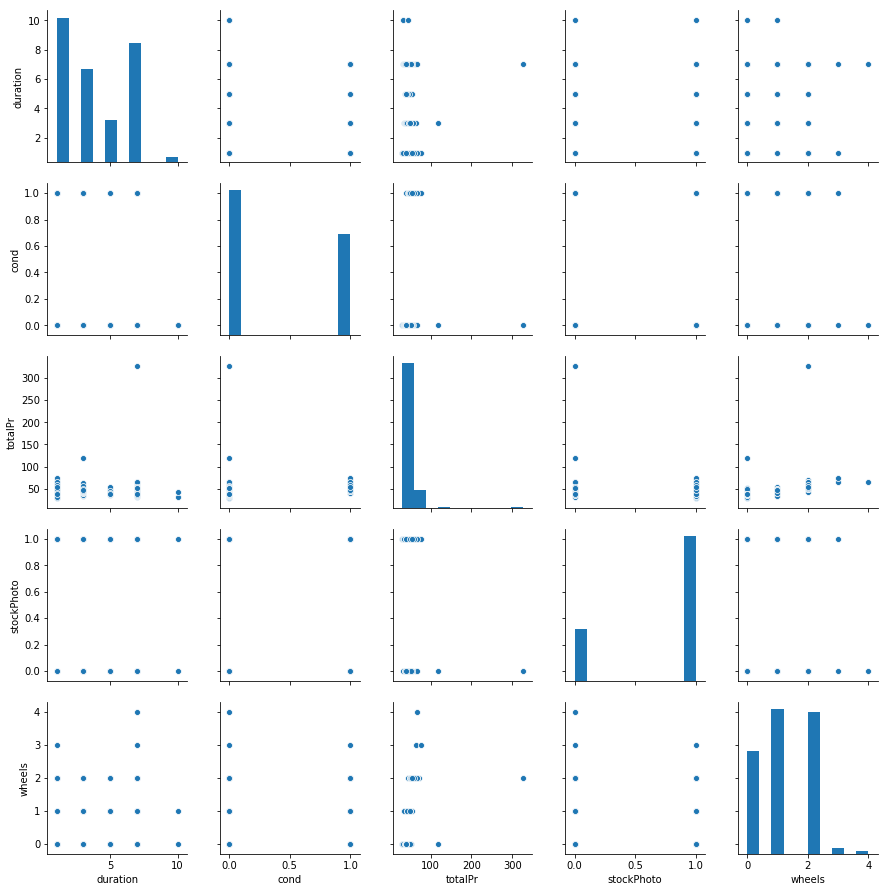

In [16]:
sns.pairplot(marioKart)

Let’s fit a linear regression model with the game’s condition as a predictor of auction price.   

The model may be written as   
$%$   
\begin{align*}\hat{price} = 47.15 + 6.62 * cond\_new\end{align*}

Perform the linear regression:

In [17]:
x = marioKart['cond']
y = marioKart['totalPr']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("intercept: %f    slope: %f" % (intercept.round(2), slope.round(2)))

intercept: 47.150000    slope: 6.620000


To get coefficient of determination (R-squared):

In [18]:
print("R-squared: %f" % r_value**2)

R-squared: 0.016221


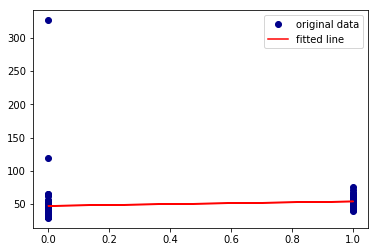

In [19]:
plt.plot(x, y, 'o', label='original data', color='darkblue')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [12]:
# Fit regression model

results = smf.ols('totalPr ~ cond', data=marioKart).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                totalPr   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.325
Date:                Wed, 21 Apr 2021   Prob (F-statistic):              0.130
Time:                        17:24:35   Log-Likelihood:                -665.42
No. Observations:                 143   AIC:                             1335.
Df Residuals:                     141   BIC:                             1341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.1481      2.790     16.900      0.0

<div class="alert alert-warning alert-warning"><b><u>What is a good p-Value ?</u></b>   
$%$   

- A <span style=color:blue><b><u>small p-value$\:$ ≤$\:$ 0.05</u></b></span> indicates <b>strong evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span>, so you <u>reject</u> the <span style=color:blue>null hypothesis $H_0$</span>.   
$%$   
- A <span style=color:blue><b><u>large p-value$\:$ >$\:$ 0.05</u></b></span> indicates <b>weak evidence against</b> the <span style=color:blue>null hypothesis $H_0$</span>, so you <u>fail to reject</u> the <span style=color:blue>null hypothesis $H_0$</span>.</div>

Note that $cond$ is a two-level categorical variable that takes value 1 when the game is new and value 0 when the game is used. So 6.62 means that the model predicts an extra $\:\$6.62$ for those games that are new versus those that are used.   
$%$  

Examining the regression output in above table, we can see that the <span style=color:blue>p-value</span> for <span style=color:blue><b>cond</b></span> is greater than the <span style=color:blue>significance value $\:\alpha\:=\:0.05\:$</span>, indicating there is <span style=color:blue><b>weak evidence</b></span> that the <b>coefficient</b> is different from <b>zero</b> when using this <span style=color:blue>simple one-variable model</span>.

### <span style=color:darkred>Including and assessing many variables in a model</span>

Sometimes there are <b>underlying structures</b> or <b>relationships</b> between <span style=color:blue><b>predictor variables</b></span>.   

For instance, new games sold on Ebay tend to come with more Wii <span style=color:blue>wheels</span>, which may have led to higher prices for those auctions. We would like to fit a model that includes all potentially important variables simultaneously. This would help us evaluate the relationship between a predictor variable and the outcome while controlling for the potential influence of other variables. This is the strategy used in multiple regression. While we remain cautious about making any causal interpretations using multiple regression, such models are a common first step in providing evidence of a causal connection.

We want to construct a model that accounts for not only the game condition, but simultaneously accounts for three other variables: <b>stock photo, duration</b>, and <b>wheels</b>.   
$%$   
\begin{align*}\hat{price} = \:\beta_0\:+\:\beta_1\:*\:cond\_new\:+\:\beta_2\:*\:stock\_photo\:+\:\beta_3\:*\:duration\:+\:\beta_4\:*\:wheels\end{align*}   
$%$   

\begin{align*}\hat{y} = \beta_0 + \beta_{1x_1} + \beta_{2x_2} + \beta_{3x_3} + \beta_{4x_4}\end{align*}

In [22]:
# Fit regression model (using the natural log of one of the regressors)

results = smf.ols('totalPr ~ cond + stockPhoto + duration + wheels', data=marioKart).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                totalPr   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     4.860
Date:                Wed, 21 Apr 2021   Prob (F-statistic):            0.00107
Time:                        16:12:07   Log-Likelihood:                -657.17
No. Observations:                 143   AIC:                             1324.
Df Residuals:                     138   BIC:                             1339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.9385      7.361      5.562      0.0

If we examined the data carefully, we would see that some predictors are correlated. For instance, when we estimated the connection of the <b><u>outcome price</u></b> and <b>predictor <u>cond</u></b> using <u><i>simple linear regression</i></u>, we were <b>unable to control for other variables</b> like the number of Wii wheels included in the auction.   

That model was biased by the confounding variable wheels. When we use both variables, this particular underlying and unintentional bias is reduced or eliminated (though bias from other confounding variables may still remain).   

we just described a <b><u>common issue in multiple regression</u></b>: <span style=color:blue>correlation among predictor variables</span>. We say the two predictor variables are <span style=color:blue><b>collinear</b> (pronounced as <u>co-linear</u> )</span> when they are <b>correlated</b>, and this <span style=color:red><b>collinearity complicates model estimation</b></span>. While it is impossible to prevent collinearity from arising in observational data, experiments are usually designed to prevent predictors from being collinear.

### <span style=color:darkred>Adjusted $\:R^2\:$ as a better estimate of explained variance</span>

We first used <span style=color:blue>$\:R^2\:$</span> to determine the <span style=color:blue><b>amount of variability</b></span> in the <b>response</b> that was <b>explained</b> by the model :   
$%$   

\begin{align*}R^2 = 1 − \frac{variability\:in\:residuals}{variablity\:in\:the\:outcome}= 1 − \frac{Var(e_i)}{Var(y_i)}\end{align*}   
$%$   
where $\:e_i\:$ represents the <b><u>residuals</u></b> of the model and $\:y_i\:$ the <b><u>outcomes</u></b>. This equation remains valid in the multiple regression framework, but a small enhancement can often be even more informative.

<div class="alert alert-block alert-danger">

This strategy for estimating $\:R^2\:$ is <b>acceptable</b> when there is <b>just a single variable</b>.
However, it becomes <b><u>less helpful</u></b> when there are <b>many variables</b>.   
$%$   
The regular $\:R^2\:$ is a <b>less estimate</b> of the <b>amount of variability</b> explained by the model. To get a <b>better estimate</b>, we use the <b>Adjusted $\:R^2\:$</b>.

<div class="alert alert-block alert-warning"><b><u>Adjusted $\:R^2\:$</u></b><u> as a tool for model assessment</u>   

The adjusted $\:R^2\:$ is computed as   
$%$   
\begin{align*}R^2_{adj} = 1 − \frac{variability\:in\:residuals}{variablity\:in\:the\:outcome}= 1 − \frac{Var(e_i)\:/\:(n - k - 1)}{Var(y_i)\:/\:(n - 1)}\:=\:1 - \frac{Var(e_i)}{Var(y_i)}\:x\:\frac{(n\:-\:1)}{(n\:-\:k\:-\:1)}\end{align*}   
$%$   
- where $\:n\:$ is the <b>number of cases</b> used to fit the model and   
- $\:k\:$ is the <b>number of predictor variables</b> in the model.   

Because $\:k\:$ is <b><u>never</u> negative</b>, the <b>adjusted $\:R^2\:$</b> will be <b>smaller</b> than the <b><u>unadjusted</u> $\:R^2\:$</b>. The reasoning behind the <b><u>adjusted</u> $\:R^2\:$</b> lies in the <b>degrees of freedom</b> associated with each <b>variance</b>.
</div>

<span style=color:blue><b>Adjusted $\:R^2\:$</b></span> could have been used in <span style=color:blue>Simple Linear Regression</span>. However, when there is only <span style=color:blue>k = 1 <b>predictors</b></span>, <span style=color:blue><b>Adjusted $\:R^2\:$</b></span> is very close to <span style=color:blue><b>regular $\:R^2\:$</b></span>.

## <span style=color:darkgreen>Model selection</span>

The best model is not always the most complicated. Sometimes including variables that are not evidently important can actually reduce the accuracy of predictions. In this section we discuss model selection strategies, which will help us eliminate variables from the model that are found to be less important.   

In practice, the model that includes all available explanatory variables is often referred to as the <span style=color:blue><b>full model</b></span>. The <span style=color:blue><b>full model</b></span> may not be the best model, and if it isn’t, we want to identify a smaller model that is preferable.

### <span style=color:darkred>Identifying variables in the model that may not be helpful</span>

<span style=color:blue><b>Adjusted $\:R^2\:$</b></span> describes the <span style=color:blue>strength of a model fit</span>, and it is a <b>useful tool for evaluating</b> which <b>predictors</b> are <span style=color:blue>adding value to the model</span>, where <span style=color:blue>adding value</span> means they <span style=color:blue><b>improve the accuracy in predicting future outcomes</b></span>.   

Let’s consider two models :   

1. The first table summarizes the full model since it includes all predictors, while the second does not include the <b>duration</b> variable.

In [23]:
# Fit regression model

results = smf.ols('totalPr ~ cond + stockPhoto + duration + wheels', data=marioKart).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                totalPr   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     4.860
Date:                Wed, 21 Apr 2021   Prob (F-statistic):            0.00107
Time:                        16:23:22   Log-Likelihood:                -657.17
No. Observations:                 143   AIC:                             1324.
Df Residuals:                     138   BIC:                             1339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.9385      7.361      5.562      0.0

In [14]:
# Fit regression model EXCLUDING " 'duration' variable, because it's p-value"

results1 = smf.ols('totalPr ~ cond + stockPhoto + wheels', data=marioKart).fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                totalPr   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     6.465
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           0.000396
Time:                        17:34:22   Log-Likelihood:                -657.25
No. Observations:                 143   AIC:                             1323.
Df Residuals:                     139   BIC:                             1334.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.2039      4.746      9.103      0.0

In [15]:
# Fit regression model EXCLUDING " 'stockPhoto' variable, because it's p-value"

results2 = smf.ols('totalPr ~ wheels', data=marioKart).fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                totalPr   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     17.23
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           5.70e-05
Time:                        17:36:47   Log-Likelihood:                -658.35
No. Observations:                 143   AIC:                             1321.
Df Residuals:                     141   BIC:                             1327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.4052      3.433     11.188      0.0

<span style=color:blue><b><u>Which of the two models is better ?</u></b>   

We compare the <span style=color:blue><b>adjusted $\:R^2\:$</b></span> of <b>each model</b> to determine which <b>to choose</b>. Since the first model has an <span style=color:blue><b>Adj $\:R^2\:$</b></span> smaller than the <span style=color:blue><b>Adj $\:R^2\:$</b></span> of the second model, we prefer the second model to the first.   
   
Will the model without duration be better than the model with duration? We cannot know for sure, but based on the adjusted R2, this is our best assessment.

here are many different ways to compute <span style=color:blue><b>$\:R^2\:$</b></span> and the <span style=color:blue><b>Adj. $\:R^2\:$</b></span>, the following are few of them (computed with the data you provided):

you can calculate the <span style=color:blue><b>Adj. $\:R^2\:$</b></span> from <span style=color:blue><b>$\:R^2\:$</b></span> with a simple formula given :

In [22]:
# results.rsquared

R2 = results.rsquared
n = marioKart.shape[0]
k = marioKart.shape[1]-2

Adj_r2 = 1-(1-R2)*(n-1)/(n-k-1)
Adj_r2.round(5)

0.10456

### <span style=color:darkred>The p-value approach, an alternative to adjusted $\:R^2$</span>

The <span style=color:blue>p-value</span> may be used as an alternative to <span style=color.blue>adjusted $\:R^2\:$</span> for model selection.   

We would identify the <b>predictor</b> corresponding to the <b>largest</b> <span style=color:blue>p-value</span>. If the <span style=color:blue>p-value</span> is <b><u>above</u></b> the <span style=color:blue>significance level</span>, usually <span style=color:blue>$\:\alpha\:$ = 0.05</span>, then we would <b>drop</b> that variable, refit the model, and repeat the process.   

If the largest <span style=color:blue>p-value</span> is <b><u>less than</u></b> <span style=color:blue>significance level</span> $\:\alpha\:$ = 0.05, then we would <b><u>not</u> eliminate</b> any <b>predictors</b> and the current model would be our <span style=color:blue><b>best-fitting model</b></span>.

In [14]:
# Fit regression model

results1 = smf.ols('totalPr ~ stockPhoto + wheels', data=marioKart).fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                totalPr   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     9.681
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           0.000115
Time:                        20:51:52   Log-Likelihood:                -657.33
No. Observations:                 143   AIC:                             1321.
Df Residuals:                     140   BIC:                             1330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9313      4.679      9.175      0.0

<div class="alert alert-block alert-success"><u>When to use the <b>adjusted $\:R^2$</b> and when to use the <b>p-value</b> approach</u>

When the <b>sole goal</b> is to <b>improve prediction accuracy</b>, use <b>adjusted $\:R^2$</b>. This is commonly the case in machine learning applications.   
$%$   
When we care about understanding which <b>variables</b> are statistically <b>significant predictors of the <u>response</u></b>, or if there is interest in producing a <b>simpler model</b> at the potential <b><u>cost</u></b> of a little <b>prediction accuracy</b>, then the <b>p-value</b> approach is preferred.

Regardless of whether you use <span style=color:blue>adjusted $\:R^2$</span> or the <span style=color:blue>p-value approach</span>, our job is not done after variable selection. We must still verify the model conditions are reasonable.

# <span style=color:darkblue>Introduction to logistic regression</span>

In this section we introduce logistic regression as a tool for building models when there is a categorical response variable with two levels. Logistic regression is a type of generalized linear model (GLM) for response variables where regular multiple regression does not work very well. In particular, the response variable in these settings often takes a form
where residuals look completely di↵erent from the normal distribution.   

GLMs can be thought of as a two-stage modeling approach. We first model the response variable using a probability distribution, such as the binomial or Poisson distribution.   

Second, we model the parameter of the distribution using a collection of predictors and a special form of multiple regression.

we will use the $\:email\:$ dataset. These emails were collected from a single email account, and we <b>will work on developing a basic spam filter</b> using these data.   

The <b>response</b> variable, <b>$\:spam\:$</b>, has been encoded to take value <b>0</b> when a message is $\:not\: spam\:$ and <b>1</b> when it is <b>$\:spam\:$</b>.   

Our task will be to build an appropriate model that classifies messages as <b>$\:spam\:$</b> or <b>$\:not\:spam\:$</b> using $\:email\:$ characteristics coded as <b>predictor</b> variables. While this model will not be the same as those used in large-scale spam filters, it shares many of the same features.

## <span style=color:darkgreen>Modeling the probability of an event</span>

<div class="alert alert-block alert-warning"><b><u>Notation for a logistic regression model</u></b>

The <b>outcome variable</b> for a <b>GLM</b> is denoted by $\:Y_i\:$, where the index $\:i\:$ is used to represent observation $\:i\:$. In the email application, $\:Y_i\:$ will be used to represent whether $\:email\:$ $\:i\:$ is <b><u>spam</u></b> ($\:Y_i\:$ = 1) or <b><u>not</u></b> ($\:Y_i\:$ = 0).   
$%$   
The <b>predictor variables</b> are represented as follows: $\:x_{1, i}\:$ is the value of variable <b>1</b> for observation $\:i\:$, $\:x_{2, i}\:$ is the value of variable <b>2</b> for observation $\:i\:$, and so on.   
</div>

<span style=color:blue><b><u>Logistic regression</u></b></span> is a generalized <b>linear model</b> where the outcome is a two-level categorical variable. The outcome, $\:Y_i\:$, takes the value <b>1</b> (in our application, this represents a spam message) with <span style=color:blue><b><u>probability</u>$\:p_i\:$</b></span> and the value <b>0</b> with <span style=color:blue><b><u>probability</u> 1 − $\:p_i\:$</b></span>. It is the <span style=color:blue><b><u>probability</u>$\:p_i\:$</b></span> that we model in relation to the <b>predictor variables</b>.